In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.patches import Patch
import os

In [3]:
df = pd.read_csv("thyroid_gsea_results.tsv", sep="\t")
df = df.fillna(0)
df.loc[df["FDR.q.val"] >= 0.05,"NES"] = np.nan
filt_dfs = []
for name, group in df.groupby("NAME"):
    if(pd.isnull(group["NES"]).all()):
        pass
    else:
        filt_dfs.append(group)
df = pd.concat(filt_dfs)
df['NAME'] = df['NAME'].map(lambda x: x.lstrip("HALLMARK").replace("_", " ").lstrip())
df = df.pivot(index='epsilon', columns='NAME', values='NES')

order = ['MYOGENESIS', 'KRAS SIGNALING DN', 'ANGIOGENESIS', 'EPITHELIAL MESENCHYMAL TRANSITION',
        'COAGULATION', 'PROTEIN SECRETION', 'ALLOGRAFT REJECTION', 'TNFA SIGNALING VIA NFKB',
         'MYC TARGETS V1', 'OXIDATIVE PHOSPHORYLATION',
        'G2M CHECKPOINT', 'E2F TARGETS', 'IL2 STAT5 SIGNALING', 'MTORC1 SIGNALING',
         'INFLAMMATORY RESPONSE', 'INTERFERON ALPHA RESPONSE', 'PEROXISOME', 'APOPTOSIS',
         'ANDROGEN RESPONSE', 'DNA REPAIR',
         'INTERFERON GAMMA RESPONSE', 'ADIPOGENESIS', 'UNFOLDED PROTEIN RESPONSE',
         'ESTROGEN RESPONSE LATE','GLYCOLYSIS', 'BILE ACID METABOLISM',
         'FATTY ACID METABOLISM', 
         'MYC TARGETS V2', 'REACTIVE OXYGEN SPECIES PATHWAY']
df = df[order]
df = df.rename(columns={"EPITHELIAL MESENCHYMAL TRANSITION": "E.P. TRANSITION",
                       "REACTIVE OXYGEN SPECIES PATHWAY": "R. OXYGEN SPECIES PATHWAY",
                       "KRAS SIGNALING DN": "KRAS SIGNALING DOWN"})
df

NAME,MYOGENESIS,KRAS SIGNALING DOWN,ANGIOGENESIS,E.P. TRANSITION,COAGULATION,PROTEIN SECRETION,ALLOGRAFT REJECTION,TNFA SIGNALING VIA NFKB,MYC TARGETS V1,OXIDATIVE PHOSPHORYLATION,...,DNA REPAIR,INTERFERON GAMMA RESPONSE,ADIPOGENESIS,UNFOLDED PROTEIN RESPONSE,ESTROGEN RESPONSE LATE,GLYCOLYSIS,BILE ACID METABOLISM,FATTY ACID METABOLISM,MYC TARGETS V2,R. OXYGEN SPECIES PATHWAY
epsilon,,,,,,,,,,,,,,,,,,,,,
-1.20,-2.105562,-1.949132,-2.190779,-1.960299,-1.675081,2.680969,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.15,-2.060998,-1.914297,-2.165633,-1.924712,-1.642829,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.10,-2.015887,-1.870627,-2.108531,-1.884944,-1.622249,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.05,-1.969973,-1.839367,-2.059286,-1.849479,-1.609730,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.00,-1.920286,-1.798909,-2.032589,-1.810108,-1.579785,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.95,-1.876147,-1.767639,-1.977735,-1.771260,-1.564443,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.90,-1.832197,-1.728979,-1.933492,-1.722817,-1.536162,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.85,-1.784958,-1.691864,-1.888079,-1.680051,-1.506147,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.80,-1.739022,-1.652647,-1.842226,-1.639343,-1.480400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='NAME', ylabel='$ϵ^\\perp$'>

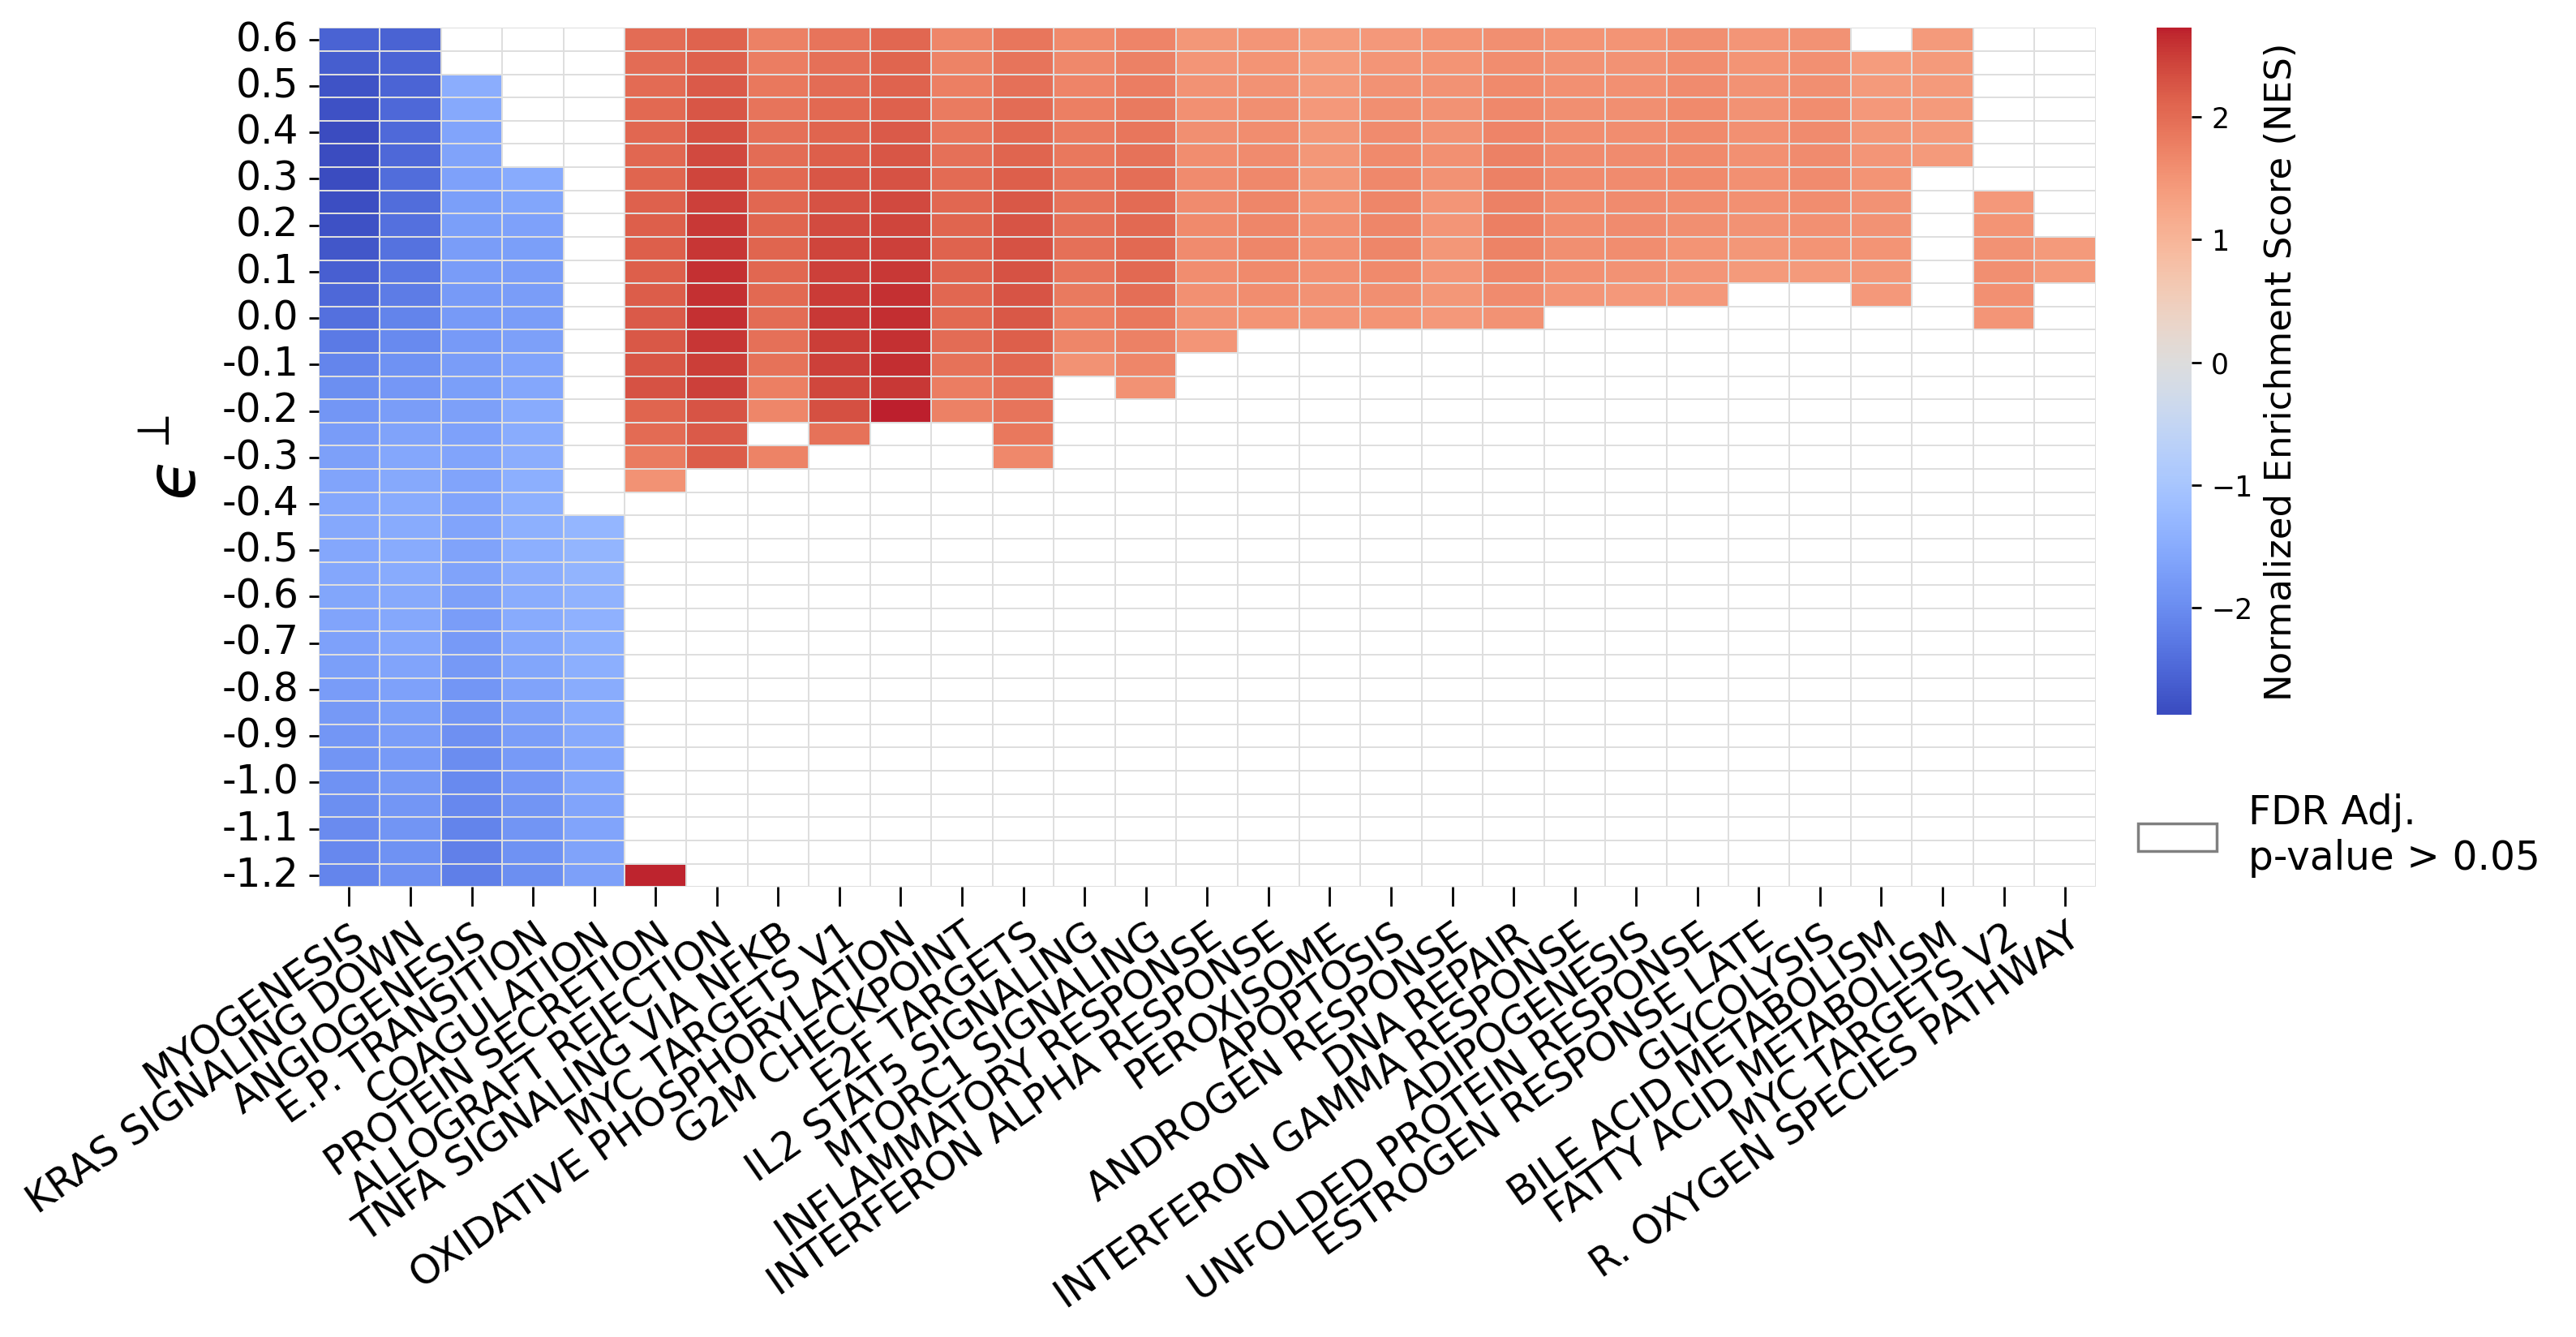

In [4]:
fig, ax = plt.subplots(figsize=(13, 5.5), dpi=250)
#twin2 = ax.twinx()
#twin2.spines["left"].set_position(("axes", -0.1))
#twin2.yaxis.set_label_position('left')
#twin2.yaxis.set_ticks_position('left')
#twin2.set_ylabel(r"Fold-Change of Scales (exp($\tilde{\theta}^\perp$))", fontdict={"size": 18})
#twin2.set_yticks(np.arange(-1.2, 0.65, 0.1), minor=False, ha="center")
#labels = [0.41, 0.45, 0.5, 0.55, 0.61, 0.67, 0.74, 0.82, 0.9, 1, 1.11, 1.22, 1.35, 1.49, 1.65, 1.82, 2.01, 2.23, 2.46]
#twin2.set_yticklabels(labels, fontsize=14, fontdict={"verticalalignment": "center"})
#twin2.set_ylim(-1.225, 0.625)
#plt.rcParams['text.usetex'] = True

sns.heatmap(df, ax=ax, center=0, cmap="coolwarm", linewidths=0.5, linecolor="#dedede",
           cbar_kws={'label': 'Normalized Enrichment Score (NES)', "shrink": .8,
                     "fraction": 0.1, "pad": 0.03, "anchor": (0, 1)}) 
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right', fontsize=14, rotation_mode="anchor")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.axes.get_xaxis().get_label().set_visible(False)
ax.set_ylabel("$ϵ^\perp$", fontdict={"size": 24})
ax.figure.axes[-1].yaxis.label.set_size(13)
ax.legend(handles=[Patch(facecolor='white', edgecolor='grey', label=r"FDR Adj."
                         "\n"
                         r"p-value > 0.05")],
          bbox_to_anchor=(0.77, -0.35, 0.5, 0.5), prop={'size': 14}, frameon=False)
ax.tick_params("x", length=7)

home = str(Path.home())
fig.savefig(os.path.join(home, 'data/output/realdata_thyroid.png'), dpi=500)
ax